# <span style="color:green"> Numerical Simulation Laboratory </span>
## <span style="color:brown"> Python Exercise 11 </span>
## <span style="color:orange"> Keras - Neural Network regression </span>

### Exercise 11.3
  
Try to extend the model to fit a simple trigonometric 2D function such as $f(x,y) = \sin(x^2+y^2)$ in the range $x \in [-3/2,3/2]$ and $y \in [-3/2,3/2]$.

2025-01-10 16:38:53.186777: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-10 16:38:53.187122: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-10 16:38:53.189382: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-10 16:38:53.219903: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-01-10 16:38:53.761277: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF

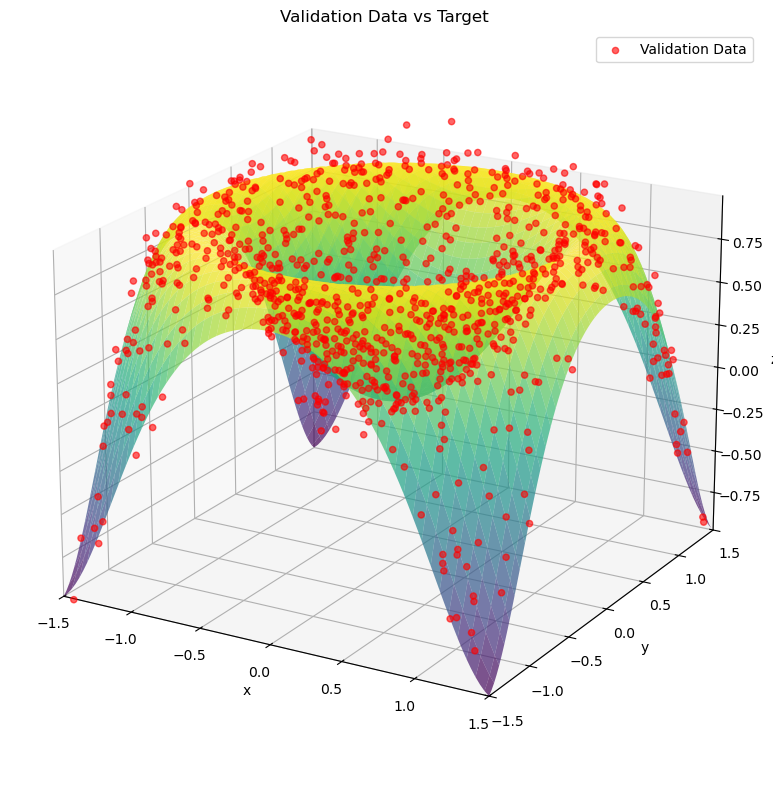

/home/enrico/anaconda3/envs/tensorf/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,417 (17.25 KB)

 Trainable params: 4,417 (17.25 KB)

 Non-trainable params: 0 (0.00 B)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from mpl_toolkits.mplot3d import Axes3D

# Generazione dei dati per l'allenamento e la validazione
N_train = 10000
N_valid = 1000
N_epoch = 25
N_batch = 32
sigma = 0.1  # Rumore

# Definizione della funzione target
def trig_function(x, y):
    return np.sin(x**2 + y**2)

# Creazione dei dati di input
np.random.seed(0)

x_train = np.random.uniform(-1.5, 1.5, N_train)
y_train = np.random.uniform(-1.5, 1.5, N_train)
z_train = trig_function(x_train, y_train) + np.random.normal(0, sigma, N_train)

x_valid = np.random.uniform(-1.5, 1.5, N_valid)
y_valid = np.random.uniform(-1.5, 1.5, N_valid)
z_valid = trig_function(x_valid, y_valid) + np.random.normal(0, sigma, N_valid)

# Preparazione dei dati per il modello
train_inputs = np.stack([x_train, y_train], axis=1)
valid_inputs = np.stack([x_valid, y_valid], axis=1)

# Creazione della griglia per la funzione target
x_pred = np.linspace(-1.5, 1.5, 100)
y_pred = np.linspace(-1.5, 1.5, 100)
x_grid, y_grid = np.meshgrid(x_pred, y_pred)
z_target = trig_function(x_grid, y_grid)

# Plot 3D dei dati di validazione e target
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Punti di validazione
ax.scatter(x_valid, y_valid, z_valid, color='r', label='Validation Data', alpha=0.6)

# Superficie della funzione target
ax.plot_surface(x_grid, y_grid, z_target, cmap='viridis', alpha=0.7)

# Personalizzazione del plot
ax.set_title('Validation Data vs Target')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.set_zlim(z_target.min(), z_target.max())
ax.view_init(elev=20, azim=-60)  # Vista centrata
ax.legend()

plt.tight_layout()
plt.show()

# Definizione del modello
model = Sequential([
    Dense(64, activation='relu', input_shape=(2,)),
    Dense(64, activation='relu'),
    Dense(1) 
])

# Compilazione del modello
model.compile(optimizer='adam', loss='mean_squared_error')

# Sommario del modello
model.summary()

In [2]:
# Allenamento del modello
history = model.fit(train_inputs, z_train, 
                    validation_data=(valid_inputs, z_valid),
                    epochs=N_epoch, 
                    batch_size=N_batch,
                    shuffle=True)

# Valutazione sui dati di validazione
score_valid = model.evaluate(valid_inputs, z_valid, verbose=1)
print("\nTEST DATA evaluation")
print("Test loss:", score_valid)

# Valutazione sulla curva esatta
z_exact = trig_function(x_valid, y_valid)
score_exact = model.evaluate(valid_inputs, z_exact, verbose=1)
print("\nEXACT CURVE evaluation")
print("Test loss:", score_exact)
print("Test accuracy:", score_exact)

Epoch 1/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 785us/step - loss: 0.1976 - val_loss: 0.1113
Epoch 2/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 544us/step - loss: 0.0926 - val_loss: 0.0465
Epoch 3/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 537us/step - loss: 0.0333 - val_loss: 0.0174
Epoch 4/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 530us/step - loss: 0.0155 - val_loss: 0.0124
Epoch 5/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 518us/step - loss: 0.0123 - val_loss: 0.0119
Epoch 6/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 526us/step - loss: 0.0119 - val_loss: 0.0133
Epoch 7/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 521us/step - loss: 0.0114 - val_loss: 0.0124
Epoch 8/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 521us/step - loss: 0.0113 - val_loss: 0.0113
Epoch 9/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 510us/step - loss: 0.0116 - val_loss: 0.0113
Epoch 10/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 530us/step - loss: 0.0118 - val_loss: 0.0105
Epoch 11/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 542us/step - loss: 0.0113 - val_loss: 0.0116
Epoch 12/25
313/313 ━━━━━━━━━━

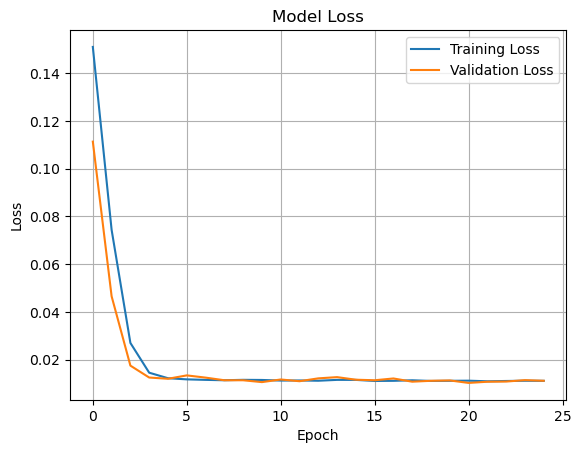

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step


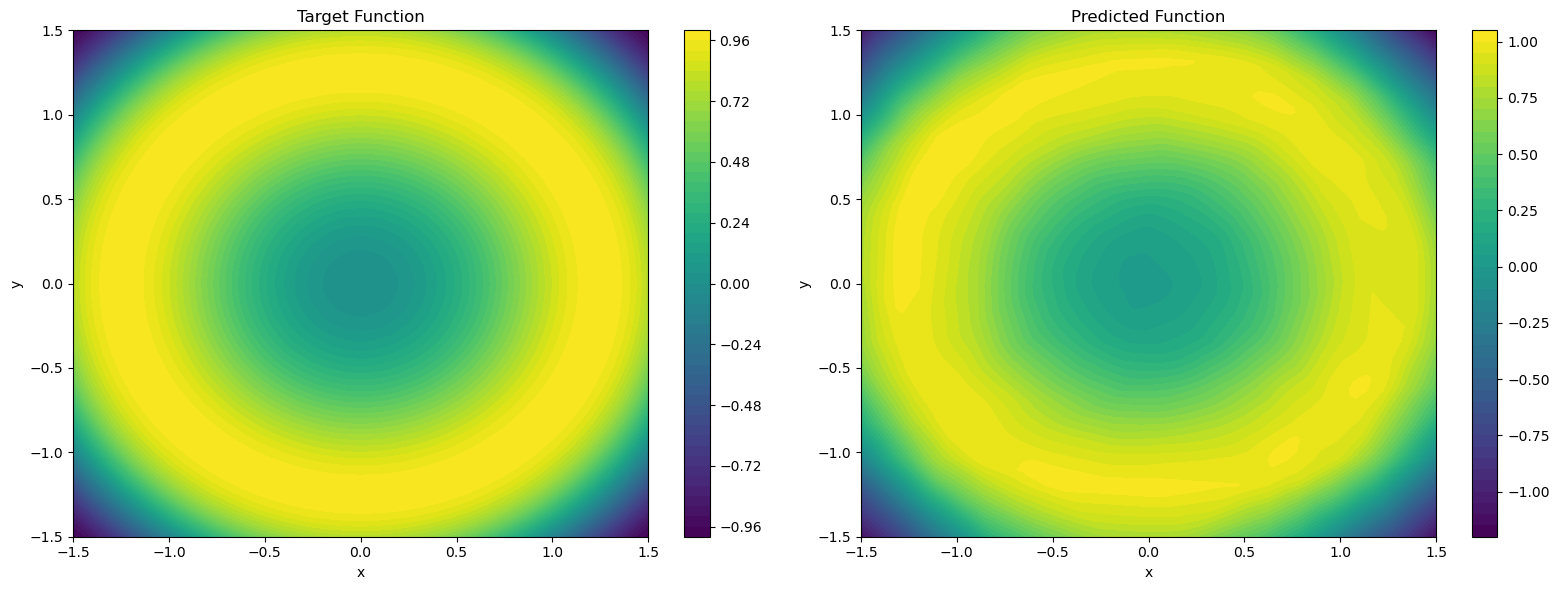

In [3]:
# Plot della perdita (loss)
plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

# Previsione del modello sulla griglia
grid_inputs = np.stack([x_grid.ravel(), y_grid.ravel()], axis=1)
z_predicted = model.predict(grid_inputs).reshape(x_grid.shape)

# Plot 2D della funzione target e dei dati previsti
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Funzione target
c1 = ax[0].contourf(x_grid, y_grid, z_target, cmap='viridis', levels=50)
ax[0].set_title('Target Function')
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
plt.colorbar(c1, ax=ax[0])

# Dati previsti
c2 = ax[1].contourf(x_grid, y_grid, z_predicted, cmap='viridis', levels=50)
ax[1].set_title('Predicted Function')
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
plt.colorbar(c2, ax=ax[1])

plt.tight_layout()
plt.show()
